In [24]:
library(tidyverse)   
library(data.table)  
library(skimr)      

In [26]:
library(data.table)

df <- fread("data/METABRIC_RNA_Mutation.csv")

head(df)

patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,⋯,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,,0,claudin-low,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0
10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,⋯,0,0,0,0,0,0,0,0,0,0


In [28]:
str(df)
skimr::skim(df)

Classes ‘data.table’ and 'data.frame':	1904 obs. of  693 variables:
 $ patient_id                    : int  0 2 5 6 8 10 14 22 28 35 ...
 $ age_at_diagnosis              : num  75.7 43.2 48.9 47.7 77 ...
 $ type_of_breast_surgery        : chr  "MASTECTOMY" "BREAST CONSERVING" "MASTECTOMY" "MASTECTOMY" ...
 $ cancer_type                   : chr  "Breast Cancer" "Breast Cancer" "Breast Cancer" "Breast Cancer" ...
 $ cancer_type_detailed          : chr  "Breast Invasive Ductal Carcinoma" "Breast Invasive Ductal Carcinoma" "Breast Invasive Ductal Carcinoma" "Breast Mixed Ductal and Lobular Carcinoma" ...
 $ cellularity                   : chr  "" "High" "High" "Moderate" ...
 $ chemotherapy                  : int  0 0 1 1 1 0 1 0 0 0 ...
 $ pam50_+_claudin-low_subtype   : chr  "claudin-low" "LumA" "LumB" "LumB" ...
 $ cohort                        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ er_status_measured_by_ihc     : chr  "Positve" "Positve" "Positve" "Positve" ...
 $ er_status                 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [30]:
colSums(is.na(df)) %>% sort(decreasing = TRUE)

tumor_stage      neoplasm_histologic_grade 
                           501                             72 
                mutation_count                     tumor_size 
                            45                             20 
                    patient_id               age_at_diagnosis 
                             0                              0 
        type_of_breast_surgery                    cancer_type 
                             0                              0 
          cancer_type_detailed                    cellularity 
                             0                              0 
                  chemotherapy    pam50_+_claudin-low_subtype 
                             0                              0 
                        cohort      er_status_measured_by_ihc 
                             0                              0 
                     er_status   her2_status_measured_by_snp6 
                             0                              0 
                   her2_status tumor_other_histologic_subtype 
                             0                              0 
               hormone_therapy      inferred_menopausal_state 
                             0                              0 
           integrative_cluster       primary_tumor_laterality 
                             0                              0 
 lymph_nodes_examined_positive    nottingham_prognostic_index 
                             0                              0 
                 oncotree_code        overall_survival_months 
                             0                              0 
              overall_survival                      pr_status 
                             0                              0 
                 radio_therapy      3-gene_classifier_subtype 
                             0                              0 
             death_from_cancer                          brca1 
                             0                              0 
                         brca2                          palb2 
                             0                              0 
                          pten                           tp53 
                             0                              0 
                           atm                           cdh1 
                             0                              0 
                         chek2                            nbn 
                             0                              0 
                           nf1                          stk11 
                             0                              0 
                         bard1                           mlh1 
                             0                              0 
                          msh2                           msh6 
                             0                              0 
                          pms2                          epcam 
                             0                              0 
                        rad51c                         rad51d 
                             0                              0 
                         rad50                            rb1 
                             0                              0 
                          rbl1                           rbl2 
                             0                              0 
                         ccna1                          ccnb1 
                             0                              0 
                          cdk1                          ccne1 
                             0                              0 
                          cdk2                         cdc25a 
                             0                              0 
                         ccnd1                           cdk4 
                             0                              0 
                          cdk6                          ccnd2 
                             0                    

In [34]:
df_clean <- df[, .(
  age_at_diagnosis,
  type_of_breast_surgery,
  cancer_type_detailed,
  cellularity,
  chemotherapy,
  hormone_therapy,
  radio_therapy,
  `pam50_+_claudin-low_subtype`,
  overall_survival,
  overall_survival_months
)]

str(df_clean)

Classes ‘data.table’ and 'data.frame':	1904 obs. of  10 variables:
 $ age_at_diagnosis           : num  75.7 43.2 48.9 47.7 77 ...
 $ type_of_breast_surgery     : chr  "MASTECTOMY" "BREAST CONSERVING" "MASTECTOMY" "MASTECTOMY" ...
 $ cancer_type_detailed       : chr  "Breast Invasive Ductal Carcinoma" "Breast Invasive Ductal Carcinoma" "Breast Invasive Ductal Carcinoma" "Breast Mixed Ductal and Lobular Carcinoma" ...
 $ cellularity                : chr  "" "High" "High" "Moderate" ...
 $ chemotherapy               : int  0 0 1 1 1 0 1 0 0 0 ...
 $ hormone_therapy            : int  1 1 1 1 1 1 1 1 1 0 ...
 $ radio_therapy              : int  1 1 0 1 1 1 1 1 1 0 ...
 $ pam50_+_claudin-low_subtype: chr  "claudin-low" "LumA" "LumB" "LumB" ...
 $ overall_survival           : int  1 1 0 1 0 0 1 0 0 0 ...
 $ overall_survival_months    : num  140.5 84.6 163.7 164.9 41.4 ...
 - attr(*, ".internal.selfref")=<externalptr> 


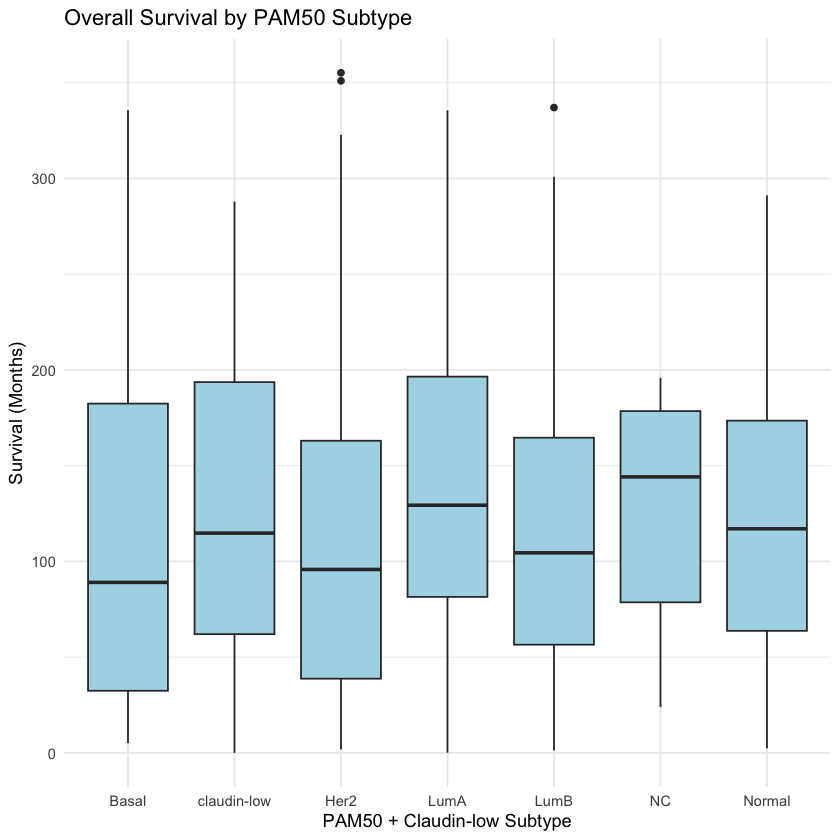

In [36]:
library(ggplot2)

ggplot(df_clean, aes(x = `pam50_+_claudin-low_subtype`, y = overall_survival_months)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Overall Survival by PAM50 Subtype",
       x = "PAM50 + Claudin-low Subtype",
       y = "Survival (Months)") +
  theme_minimal()

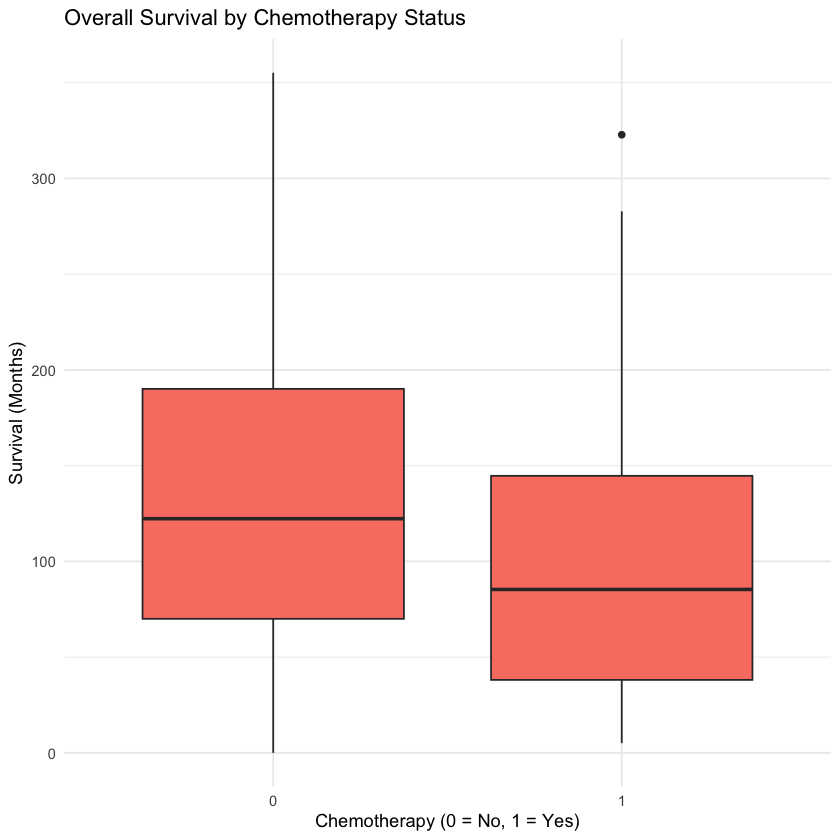

In [38]:
ggplot(df_clean, aes(x = factor(chemotherapy), y = overall_survival_months)) +
  geom_boxplot(fill = "salmon") +
  labs(title = "Overall Survival by Chemotherapy Status",
       x = "Chemotherapy (0 = No, 1 = Yes)",
       y = "Survival (Months)") +
  theme_minimal()

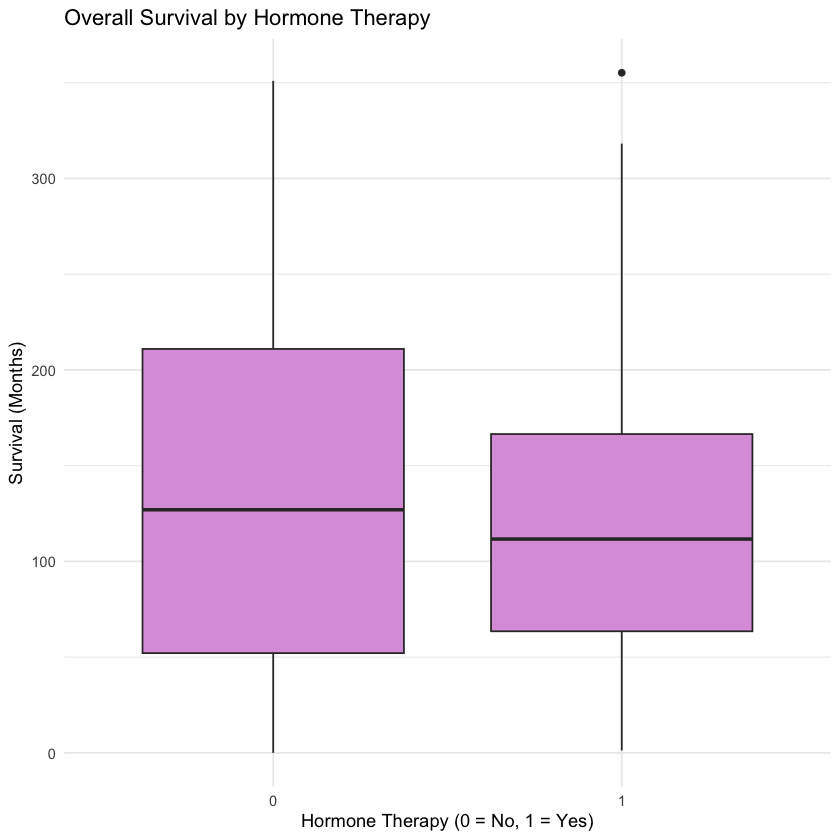

In [40]:
ggplot(df_clean, aes(x = factor(hormone_therapy), y = overall_survival_months)) +
  geom_boxplot(fill = "plum") +
  labs(title = "Overall Survival by Hormone Therapy",
       x = "Hormone Therapy (0 = No, 1 = Yes)",
       y = "Survival (Months)") +
  theme_minimal()

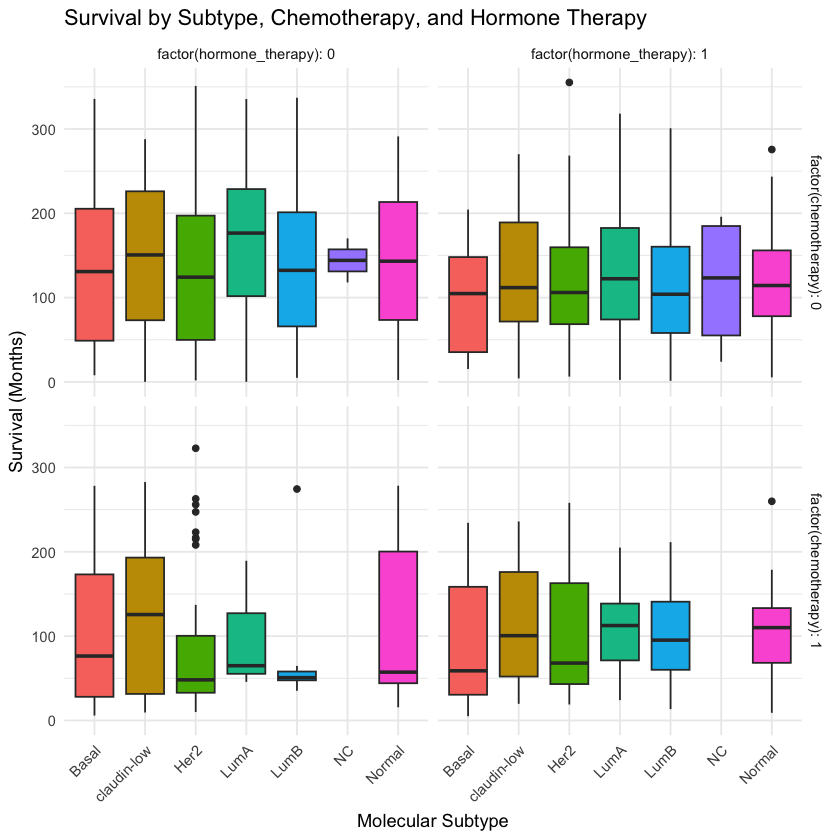

In [42]:
ggplot(df_clean, aes(x = `pam50_+_claudin-low_subtype`,
                     y = overall_survival_months,
                     fill = `pam50_+_claudin-low_subtype`)) +
  geom_boxplot() +
  facet_grid(factor(chemotherapy) ~ factor(hormone_therapy),
             labeller = label_both) +
  labs(title = "Survival by Subtype, Chemotherapy, and Hormone Therapy",
       x = "Molecular Subtype",
       y = "Survival (Months)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

kruskal.test(overall_survival_months ~ chemotherapy, data = df_clean)

Summary of Findings:
We analyzed the METABRIC dataset to explore relationships between treatment modalities and patient survival in breast cancer cases. After cleaning the data, we visualized overall survival by chemotherapy, hormone therapy, and molecular subtype. The combined boxplot showed variations in survival based on therapy combinations across subtypes. A Kruskal-Wallis test confirmed that chemotherapy is significantly associated with differences in survival outcomes (χ² = 53.05, p < 0.001). These findings highlight the importance of personalized treatment strategies and suggest that both chemotherapy and hormone therapy can impact survival depending on molecular subtype.